## Medical Cost Personal Insurance Project

### Project Description
Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .
Columns                                            
•	age: age of primary beneficiary

•	sex: insurance contractor gender, female, male

•	bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg/m^2) using the ratio of height to weight, ideally 18.5 to 24.9.

•	children: Number of children covered by health insurance / Number of dependents

•	smoker: Smoking

•	region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

•	charges: Individual medical costs billed by health insurance

### Objective : To accurately predict insurance costs

Dataset Link-
https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv


In [317]:
# Importing libraries
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [318]:
os.chdir("F:\\FlipRobo\\Projects\\Medical insurance\\")
df=pd.read_csv('medical_cost_insurance.csv', na_values=["?"])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [319]:
df.shape

(1338, 7)

### Exploratory data analysis

In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### Observation: sex, smoker and region are object data type

In [321]:
df.replace(" ", np.nan)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [322]:
df1=df.drop_duplicates(keep='first',inplace=False)  # Dropping duplicate values if any
df1.shape

(1337, 7)

#### Observation: There are no null values in any row

In [323]:
df1.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

#### Observation: age, bmi and charges are continuous variable whereas sex, children, smoker and region are discrete variables

In [324]:
df1.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337,1337.000000,1337.000000,1337,1337,1337.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,675,NaN,NaN,1063,364,NaN
mean,39.222139,NaN,30.663452,1.095737,NaN,NaN,13279.121487
std,14.044333,NaN,6.100468,1.205571,NaN,NaN,12110.359656
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.290000,0.000000,NaN,NaN,4746.344000
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9386.161300
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16657.717450


#### Observation: sex, smoker and region are categorical variables

## Visualization

### Check for skewness of continuous variables

skewness of age: 0.054780773126998195
skewness of bmi: 0.28391419385321137


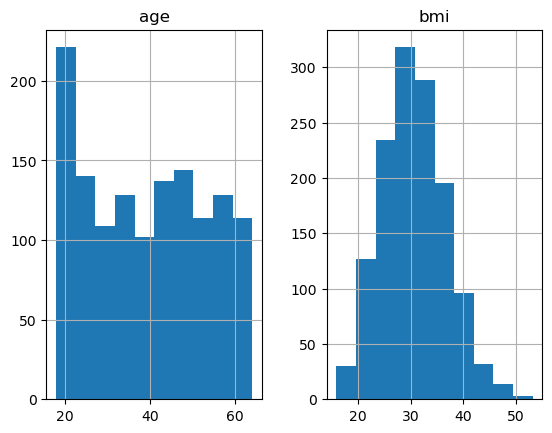

In [325]:
for i in ['age', 'bmi']:
    skew = df1[i].skew()
    print(f'skewness of {i}: {skew}')
    
df1[['age', 'bmi']].hist()
plt.show()

#### Observation: 'bmi' is little skewed. But it can be ignored.

### Check for categorical variables

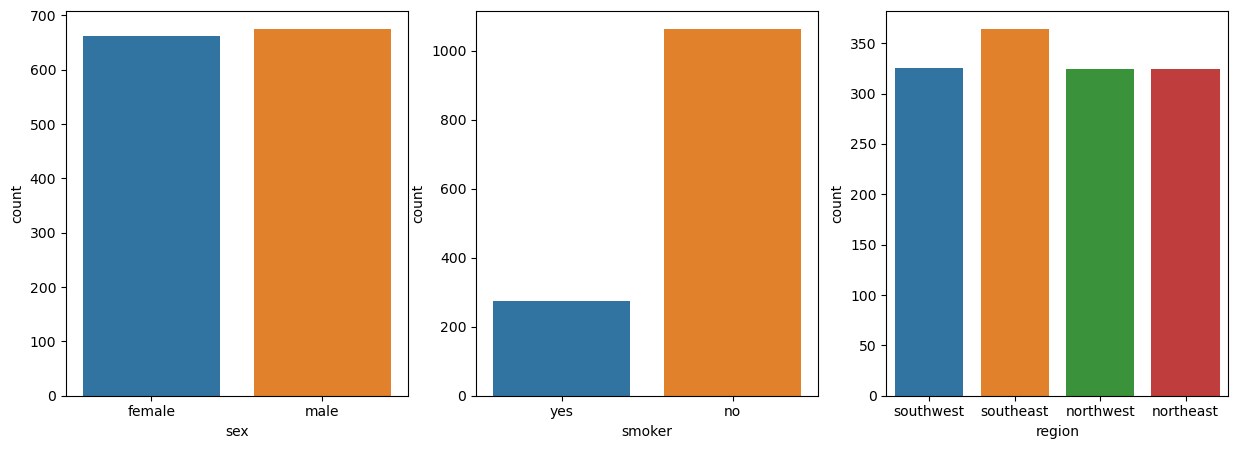

In [326]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot count plots for each categorical variable
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(data=df1, x='sex')

plt.subplot(1, 3, 2)
sns.countplot(data=df1, x='smoker')

plt.subplot(1, 3, 3)
sns.countplot(data=df1, x='region')

plt.show()


### Check for multicollinearity

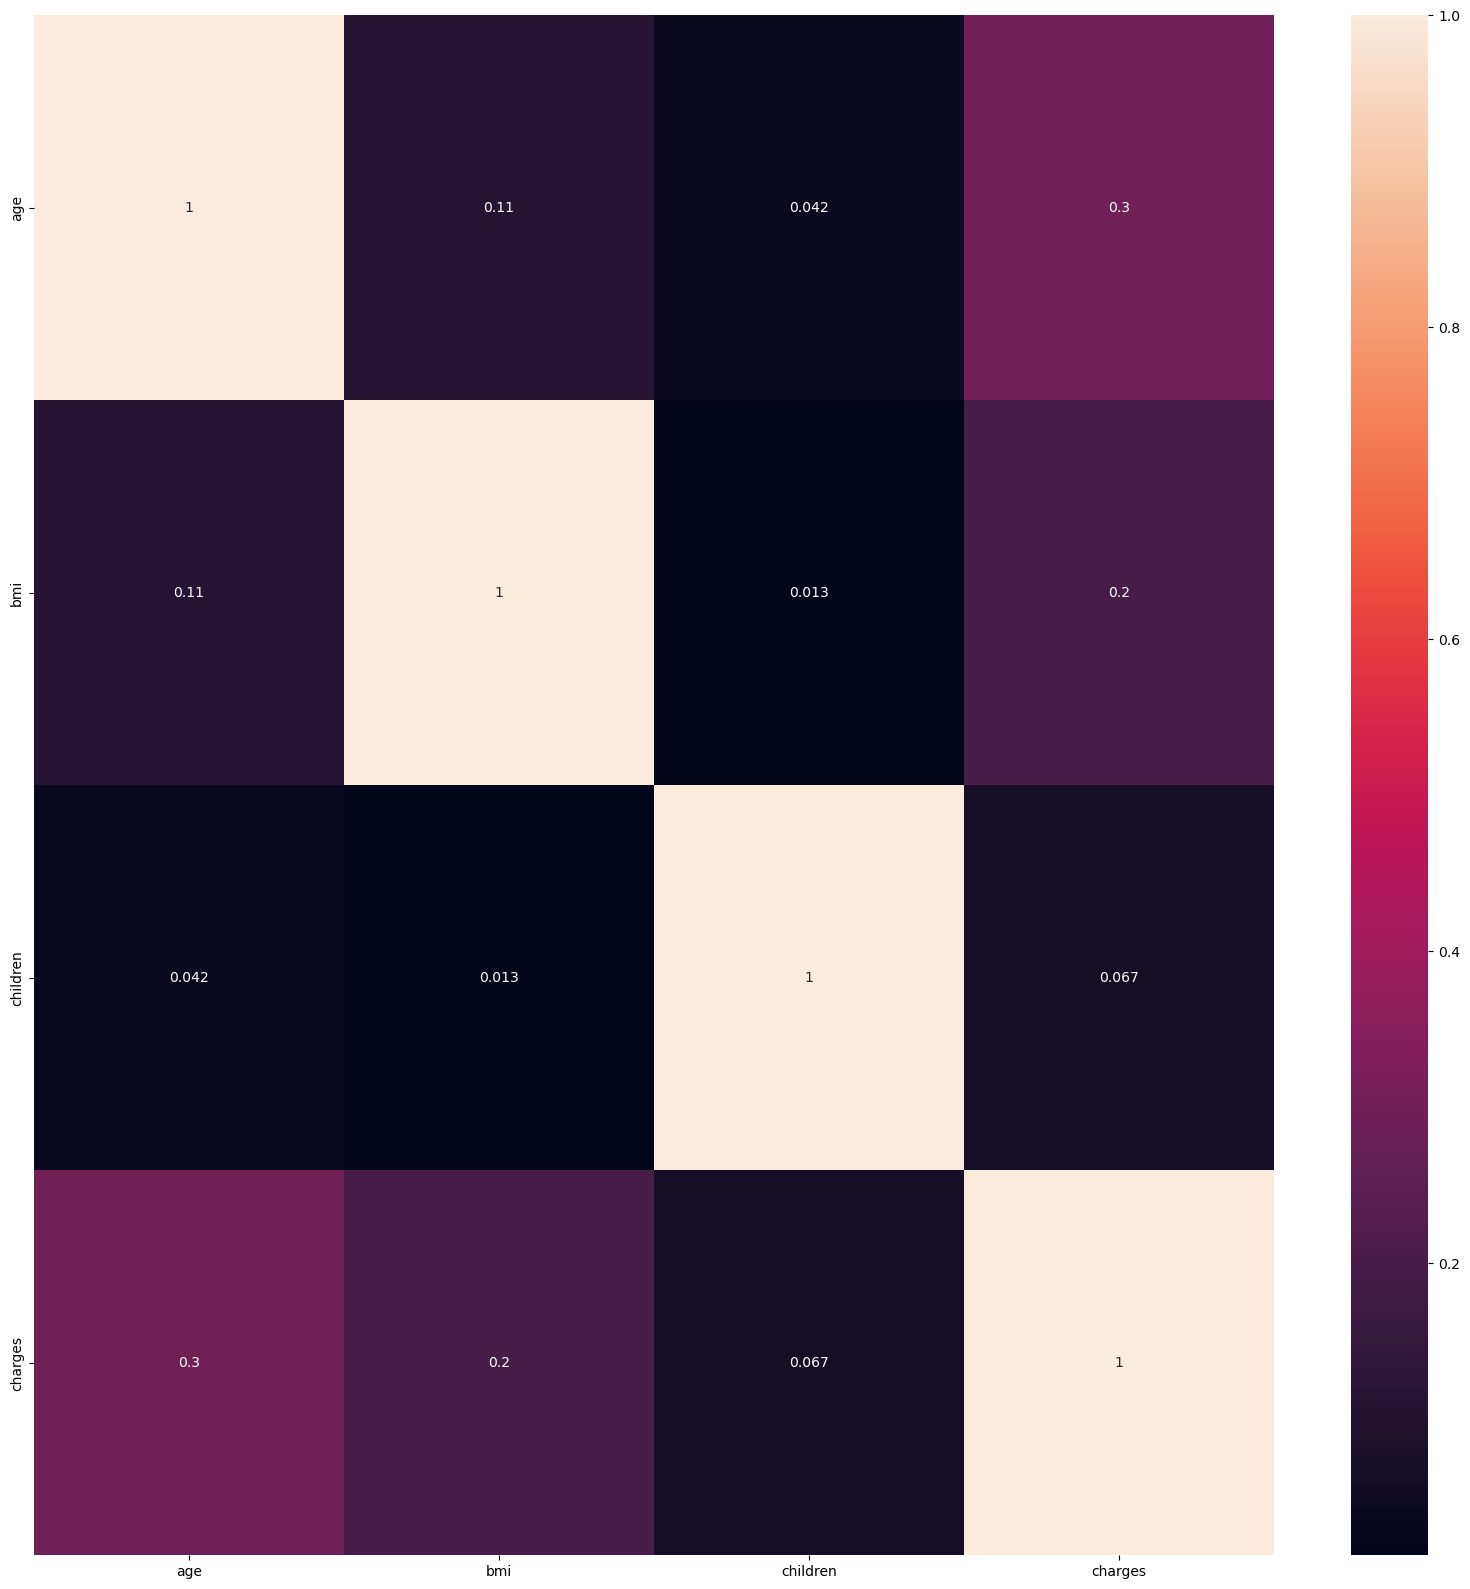

In [327]:
plt.figure(figsize=(20,20))
sns.heatmap(abs(df1.corr()), annot=True)
plt.show()

#### Observation: There are no significant correlations between the variables.

### Encoding categorical variables: Using one hot encoding

In [328]:
df_encoded = pd.get_dummies(df1, columns=['sex', 'smoker', 'region'])
df_encoded

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [329]:
df_encoded.shape

(1337, 12)

#### Observation: As aresult of one hot encoding, the features: 'sex', 'smoker', 'region' are replaced by 'sex_female', 'sex_male', 

#### 'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest', 'region_southeast','region_southwest'. Therefore, there was a net 

#### addition of 5 new features. In the encoded data set, there are a total of 12 columns, which is an increase of 5 columns from initial 

#### 7 columns.

In [330]:
df_encoded.isnull().sum()

age                 0
bmi                 0
children            0
charges             0
sex_female          0
sex_male            0
smoker_no           0
smoker_yes          0
region_northeast    0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64

#### Splitting the dataset as features (X) and target (y)

In [331]:
X=df_encoded[['age', 'bmi', 'children','sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest']]
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [332]:
X.columns

Index(['age', 'bmi', 'children', 'sex_female', 'sex_male', 'smoker_no',
       'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [333]:
y=df_encoded['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

### Scaling the features

In [334]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X1=scaler.fit_transform(X)
X2=pd.DataFrame(X1, columns=X.columns)
X2

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.440418,-0.453160,-0.909234,1.009771,-1.009771,-1.969660,1.969660,-0.565546,-0.565546,-0.611638,1.764609
1,-1.511647,0.509422,-0.079442,-0.990324,0.990324,0.507702,-0.507702,-0.565546,-0.565546,1.634955,-0.566698
2,-0.799350,0.383155,1.580143,-0.990324,0.990324,0.507702,-0.507702,-0.565546,-0.565546,1.634955,-0.566698
3,-0.443201,-1.305052,-0.909234,-0.990324,0.990324,0.507702,-0.507702,-0.565546,1.768203,-0.611638,-0.566698
4,-0.514431,-0.292456,-0.909234,-0.990324,0.990324,0.507702,-0.507702,-0.565546,1.768203,-0.611638,-0.566698
...,...,...,...,...,...,...,...,...,...,...,...
1332,0.767704,0.050269,1.580143,-0.990324,0.990324,0.507702,-0.507702,-0.565546,1.768203,-0.611638,-0.566698
1333,-1.511647,0.206053,-0.909234,1.009771,-1.009771,0.507702,-0.507702,1.768203,-0.565546,-0.611638,-0.566698
1334,-1.511647,1.014490,-0.909234,1.009771,-1.009771,0.507702,-0.507702,-0.565546,-0.565546,1.634955,-0.566698
1335,-1.297958,-0.797524,-0.909234,1.009771,-1.009771,0.507702,-0.507702,-0.565546,-0.565546,-0.611638,1.764609


In [335]:
X2.describe()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
count,1.337000e+03,1.337000e+03,1.337000e+03,1.337000e+03,1.337000e+03,1.337000e+03,1.337000e+03,1.337000e+03,1.337000e+03,1.337000e+03,1.337000e+03
mean,-7.323984e-17,-2.060182e-16,1.544514e-17,1.195753e-16,-1.195753e-16,2.059352e-16,-2.059352e-16,-8.818675e-17,2.331717e-16,-1.984617e-16,-8.851890e-17
std,1.000374e+00,1.000374e+00,1.000374e+00,1.000374e+00,1.000374e+00,1.000374e+00,1.000374e+00,1.000374e+00,1.000374e+00,1.000374e+00,1.000374e+00
min,-1.511647e+00,-2.411119e+00,-9.092342e-01,-9.903236e-01,-1.009771e+00,-1.969660e+00,-5.077017e-01,-5.655458e-01,-5.655458e-01,-6.116377e-01,-5.666977e-01
25%,-8.705798e-01,-7.171725e-01,-9.092342e-01,-9.903236e-01,-1.009771e+00,5.077017e-01,-5.077017e-01,-5.655458e-01,-5.655458e-01,-6.116377e-01,-5.666977e-01
50%,-1.582291e-02,-4.320166e-02,-7.944162e-02,-9.903236e-01,9.903236e-01,5.077017e-01,-5.077017e-01,-5.655458e-01,-5.655458e-01,-6.116377e-01,-5.666977e-01
75%,8.389340e-01,6.619260e-01,7.503509e-01,1.009771e+00,9.903236e-01,5.077017e-01,-5.077017e-01,-5.655458e-01,-5.655458e-01,1.634955e+00,-5.666977e-01
max,1.764921e+00,3.684136e+00,3.239729e+00,1.009771e+00,9.903236e-01,5.077017e-01,1.969660e+00,1.768203e+00,1.768203e+00,1.634955e+00,1.764609e+00


#### Observations: 
#### (1) All the columns are now within similar range.
#### (2) Means of all the columns are near zero

## Model building

In [336]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,make_scorer
from sklearn.model_selection import cross_val_score,GridSearchCV

#### Random state: To estimate the best random state

In [337]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
r2_max=0
r_state=0
RF=RandomForestRegressor()
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X2,y,test_size=0.3,random_state=i)
    
    model_RF=RF.fit(X_train,y_train)
    y_pred_RF=model_RF.predict(X_test)
    r2_RF=r2_score(y_test,y_pred_RF)
    if r2_RF>r2_max:
        r2_max=r2_RF
        r_state=i
print(f'Best r2 score: {r2_max}')
print(f'Random state: {r_state}')
        

Best r2 score: 0.8921490025031064
Random state: 710


#### Train Test Split: Based on the random state = 710

In [338]:
X_train,X_test,y_train,y_test = train_test_split(X2,y, test_size=0.3,random_state=710)

### Linear Regression

In [339]:
LR=LinearRegression()
model=LR.fit(X_train,y_train)
y_pred=model.predict(X_test)
r2=r2_score(y_pred,y_test)
MAE=mean_absolute_error(y_pred,y_test)
MSE=mean_squared_error(y_pred,y_test)
cv_score=cross_val_score(LR,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'r2 score: {r2}')
print(f'Mean absolute error: {MAE}')
print(f'Mean square error: {MSE}')
print(f'Cross validation score: {cv_score}')

r2 score: 0.6891575261710494
Mean absolute error: 4043.3947166660923
Mean square error: 33929026.15638775
Cross validation score: 0.7187558621526617


### Ridge Regression

In [340]:
RR=Ridge()
model=RR.fit(X_train,y_train)
y_pred=model.predict(X_test)
r2=r2_score(y_pred,y_test)
MAE=mean_absolute_error(y_pred,y_test)
MSE=mean_squared_error(y_pred,y_test)
cv_score=cross_val_score(RR,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'r2 score: {r2}')
print(f'Mean absolute error: {MAE}')
print(f'Mean square error: {MSE}')
print(f'Cross validation score: {cv_score}')

r2 score: 0.6886852883617847
Mean absolute error: 4043.936565663757
Mean square error: 33936737.893095106
Cross validation score: 0.7193375823865689


### Lasso Regression

In [341]:
LaR=Lasso()
model=LaR.fit(X_train,y_train)
y_pred=model.predict(X_test)
r2=r2_score(y_pred,y_test)
MAE=mean_absolute_error(y_pred,y_test)
MSE=mean_squared_error(y_pred,y_test)
cv_score=cross_val_score(LaR,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'r2 score: {r2}')
print(f'Mean absolute error: {MAE}')
print(f'Mean square error: {MSE}')
print(f'Cross validation score: {cv_score}')

r2 score: 0.6890659218209021
Mean absolute error: 4043.2444271423988
Mean square error: 33926570.668699875
Cross validation score: 0.7193307806510985


### Linear regression with polynomial features (degree = 2)

In [342]:
PF=PolynomialFeatures()
X_train_poly=PF.fit_transform(X_train)
X_test_poly=PF.transform(X_test)
PFR=LinearRegression()
model=PFR.fit(X_train_poly,y_train)
y_pred=model.predict(X_test_poly)
r2=r2_score(y_pred,y_test)
MAE=mean_absolute_error(y_pred,y_test)
MSE=mean_squared_error(y_pred,y_test)
cv_score=cross_val_score(PFR,X_train_poly,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'r2 score: {r2}')
print(f'Mean absolute error: {MAE}')
print(f'Mean square error: {MSE}')
print(f'Cross validation score: {cv_score}')

r2 score: 0.8489932871128701
Mean absolute error: 2797.245829154229
Mean square error: 19565806.19253616
Cross validation score: 0.8085408410654666


### Decission Tree Regression

In [343]:
DT=DecisionTreeRegressor()
model=DT.fit(X_train,y_train)
y_pred=model.predict(X_test)
r2=r2_score(y_pred,y_test)
MAE=mean_absolute_error(y_pred,y_test)
MSE=mean_squared_error(y_pred,y_test)
cv_score=cross_val_score(DT,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'r2 score: {r2}')
print(f'Mean absolute error: {MAE}')
print(f'Mean square error: {MSE}')
print(f'Cross validation score: {cv_score}')

r2 score: 0.7905878953152271
Mean absolute error: 2541.513199303483
Mean square error: 32242457.175154094
Cross validation score: 0.6542668155671916


### Random Forest Regression

In [344]:
RF=RandomForestRegressor()
model=RF.fit(X_train,y_train)
y_pred=model.predict(X_test)
r2=r2_score(y_pred,y_test)
MAE=mean_absolute_error(y_pred,y_test)
MSE=mean_squared_error(y_pred,y_test)
cv_score=cross_val_score(RF,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'r2 score: {r2}')
print(f'Mean absolute error: {MAE}')
print(f'Mean square error: {MSE}')
print(f'Cross validation score: {cv_score}')

r2 score: 0.8728388951603889
Mean absolute error: 2324.649952439051
Mean square error: 17104138.510961596
Cross validation score: 0.8023006400877964


### Gradient Boosting Regression

In [345]:
GB=GradientBoostingRegressor()
model=GB.fit(X_train,y_train)
y_pred=model.predict(X_test)
r2=r2_score(y_pred,y_test)
MAE=mean_absolute_error(y_pred,y_test)
MSE=mean_squared_error(y_pred,y_test)
cv_score=cross_val_score(GB,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'r2 score: {r2}')
print(f'Mean absolute error: {MAE}')
print(f'Mean square error: {MSE}')
print(f'Cross validation score: {cv_score}')

r2 score: 0.8787226426909485
Mean absolute error: 2247.854166114368
Mean square error: 15820129.46020475
Cross validation score: 0.8226126607370462


### Adaboost Regression

In [346]:
AR=AdaBoostRegressor()
model=AR.fit(X_train,y_train)
y_pred=model.predict(X_test)
r2=r2_score(y_pred,y_test)
MAE=mean_absolute_error(y_pred,y_test)
MSE=mean_squared_error(y_pred,y_test)
cv_score=cross_val_score(AR,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'r2 score: {r2}')
print(f'Mean absolute error: {MAE}')
print(f'Mean square error: {MSE}')
print(f'Cross validation score: {cv_score}')

r2 score: 0.8309823145035468
Mean absolute error: 3831.4401754561263
Mean square error: 21426272.74108978
Cross validation score: 0.7857022732977819


### Bagging Regression

In [347]:
BR=BaggingRegressor()
model=BR.fit(X_train,y_train)
y_pred=model.predict(X_test)
r2=r2_score(y_pred,y_test)
MAE=mean_absolute_error(y_pred,y_test)
MSE=mean_squared_error(y_pred,y_test)
cv_score=cross_val_score(BR,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'r2 score: {r2}')
print(f'Mean absolute error: {MAE}')
print(f'Mean square error: {MSE}')
print(f'Cross validation score: {cv_score}')

r2 score: 0.8627914475007357
Mean absolute error: 2394.121995016418
Mean square error: 18553796.28671031
Cross validation score: 0.7888554343763265


### K Neighbors Regression

In [348]:
KN=KNeighborsRegressor()
model=KN.fit(X_train,y_train)
y_pred=model.predict(X_test)
r2=r2_score(y_pred,y_test)
MAE=mean_absolute_error(y_pred,y_test)
MSE=mean_squared_error(y_pred,y_test)
cv_score=cross_val_score(KN,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'r2 score: {r2}')
print(f'Mean absolute error: {MAE}')
print(f'Mean square error: {MSE}')
print(f'Cross validation score: {cv_score}')

r2 score: 0.7594766261963534
Mean absolute error: 3349.657894047761
Mean square error: 28552279.772273723
Cross validation score: 0.7427221353215552


## Observations: r2 scores of different models are:-
###  (1) Linear models
####        (a) Linear Regression = 0.689
####        (b) Ridge Regression = 0.689
####        (c) Lasso Regression = 0.689
####        (d) Linear Regression with Polynomial Features(degree=2) = 0.849

### (2) Decission Tree Regression = 0.787

### (3) Ensemble models
####      (a) Random Forest = 0.870
####      (b) Gradient Boosting Regression = 0.879
####      (c) AdaBoostRegression = 0.831
####      (d) Bagging Regression = 0.853

### (4) K Neighbors Regression = 0.759

## Conclusion: Among all the regression models Gradient Boosting (0.879) has the best r2 score. Therefore, now this model will be used for hyperparameter tuning to explore the possibilities to increase its accuracy further.

## Hyperparameter tuning: Gradient Boosting Regressor

### To check the current values of hyperparameters

In [349]:
from pprint import pprint
print('Parameters currently in use:\n')
pprint(GB.get_params())

Parameters currently in use:

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [350]:
from sklearn.model_selection import GridSearchCV
hyp = {
    
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'verbose':[0]
}

grid_search = GridSearchCV(GB, param_grid=hyp, cv=10, scoring=make_scorer(r2_score), n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train,y_train)

print("Best parameters:", grid_search.best_params_)
print("Best estimators:", grid_search.best_estimator_)
print("Best score:", grid_search.best_score_)

Best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'verbose': 0}
Best estimators: GradientBoostingRegressor(learning_rate=0.05)
Best score: 0.8306854180413972


###  Observation: After hyperparameter tuning with selected hyperparameters, the best parameters give a r2 score with Gradient Boosting Regression (0.831), which is lower than that of the default Gradient Boosting Regression (0.879).

### Therefore, saving the default Gradient Boosting Regression model as the final model.

### Saving the default Gradient Boosting Regression model

In [351]:
import pickle
file_name='medical_insurance.pkl'
pickle.dump(GB,open(file_name,'wb'))

### Loading the saved model

In [353]:
loaded_model=pickle.load(open('medical_insurance.pkl','rb'))
result=loaded_model.score(X_test,y_test)
print(result)

0.8995706558142762
